In [39]:
import numpy as np
import pandas as pd
import matplotlib
import math
import skbio



In [133]:
df=pd.read_excel("currentdata.xlsx")
df2=pd.read_csv("merged022120.csv")
div=df2
#df=df.transpose()
df.head()
df2.head()
div.head()

,type,NHLC_WT,NHLC_1A,NHLC_1B,NHLC_2A,NHLC_2B,NHLC_3A,NHLC_3B,NHLC_4B,NHLC_4C,...,NHLC_17A,NHLC_17B,NHLC_18A,NHLC_18B,NHLC_19A,NHLC_19B,NHLC_20A,NHLC_20B,NHLC_21A,NHLC_21B
0,p1p7del,4,0,0,0,0,0,2,0,0,...,0,19,1,0,0,0,0,3,0,2
1,p1p6del,2,0,0,0,0,0,0,0,0,...,0,2,2,0,0,0,0,0,3,0
2,p1p4del,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,p1p5del,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,p2p6del,10,0,0,0,0,0,0,0,2,...,0,0,2,0,0,0,418,400,175,194


In [41]:
for i in range(len(df["Type"])): #cleaning extra space character from type field
    value = df["Type"][i]
    df["Type"][i] = value[:-1]
df.set_index("Type", inplace=True)

/home/nekose/anaconda3/envs/main/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
df2.set_index("type", inplace=True)


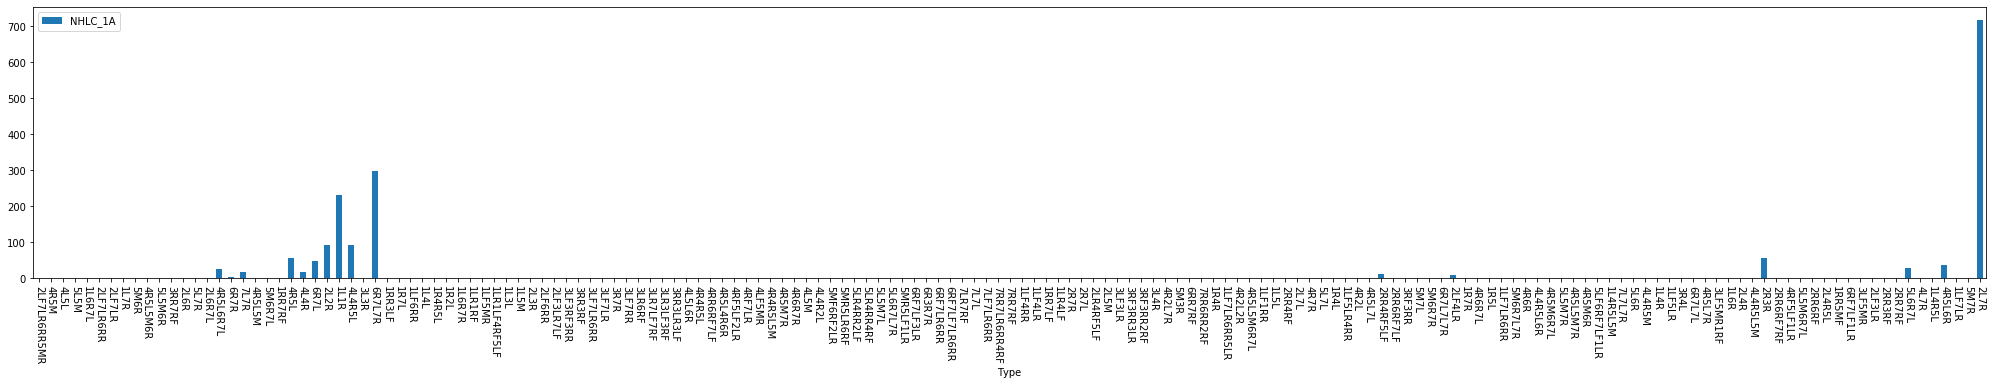

In [43]:
#df["NHLC_WT"].astype(int)
ax = df.plot.bar(y="NHLC_1A", figsize = (35,5), rot=-90)
#df=df.astype(int)
#print(df.dtypes)

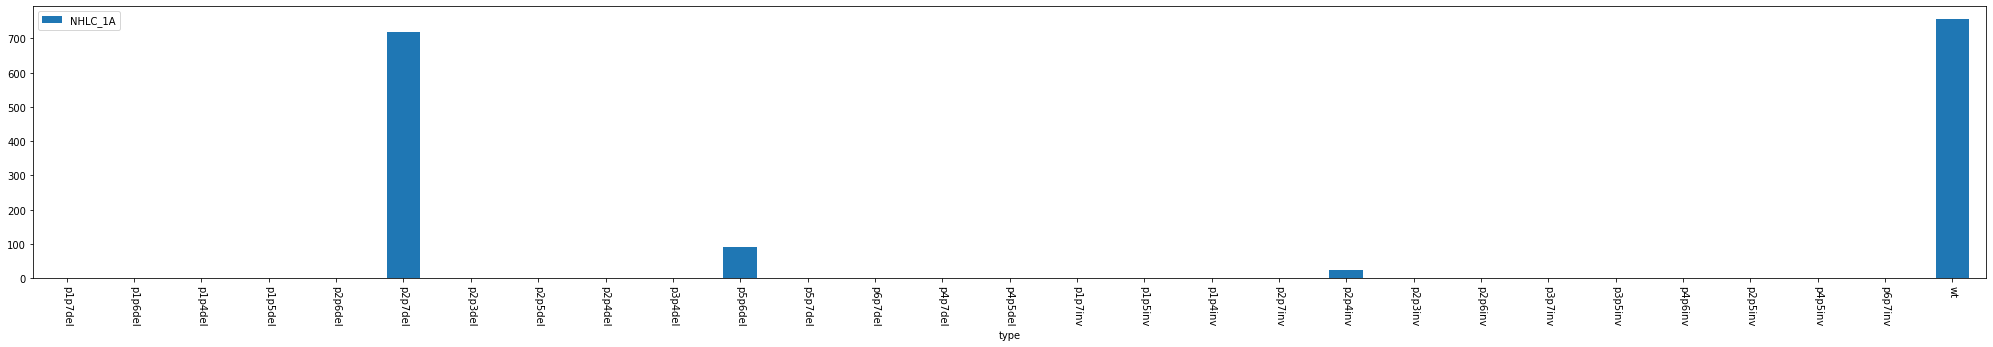

In [44]:
ax = df2.plot.bar(y="NHLC_1A", figsize = (35,5), rot=-90)

In [45]:
#adding one to every field for psuedocounting purposes
KLdf = df2
KLdf = KLdf.astype("float64")
for key, row in KLdf.iteritems():
    for key2, row2 in row.iteritems():
        KLdf.loc[key2][key] += 1
        
for key, row in KLdf.iteritems():
    for key2, row2 in row.iteritems():
        if KLdf.loc[key2][key] <= 0:
            print("error in",key2,key)

In [46]:
#Convert dataframes to frequencies of each column
for key, row in KLdf.iteritems():
    for key2, row2 in row.iteritems():
        value = KLdf.loc[key2][key]
        KLdf.loc[key2][key] = (value / sum(row))

In [47]:
# calculating KL distance between two distrubtions. Distance(P||Q) = summation[Pi*Log2(Pi/Qi)]

KLresults = {}
for key, row in KLdf.iteritems():
    for key2, row2 in KLdf.iteritems():
        if key == key2:
            continue
        data = row * np.log2(row/row2)
        resultkey = key + "-" + key2
        KLresults[resultkey] = sum(data)
        
        

In [48]:
resultframe = pd.DataFrame.from_dict(KLresults, orient = 'index', columns = ["KL_Distance"])

In [49]:
#Pulling values from the NHLC_16B samples:
print(resultframe[resultframe.index.str.contains("NHLC_16B-")])

                   KL_Distance
NHLC_16B-NHLC_WT      9.231185
NHLC_16B-NHLC_1A      8.250919
NHLC_16B-NHLC_1B      8.449011
NHLC_16B-NHLC_2A      9.412669
NHLC_16B-NHLC_2B      9.534836
NHLC_16B-NHLC_3A      9.037348
NHLC_16B-NHLC_3B      8.313250
NHLC_16B-NHLC_4B      9.522262
NHLC_16B-NHLC_4C      9.275238
NHLC_16B-NHLC_5A      8.759774
NHLC_16B-NHLC_5B      8.808842
NHLC_16B-NHLC_6A      8.853614
NHLC_16B-NHLC_6B      8.357291
NHLC_16B-NHLC_7A      9.082098
NHLC_16B-NHLC_7B      8.203893
NHLC_16B-NHLC_8A      9.027970
NHLC_16B-NHLC_8B      9.382457
NHLC_16B-NHLC_9A      9.493236
NHLC_16B-NHLC_9B      9.363718
NHLC_16B-NHLC_10A     9.024541
NHLC_16B-NHLC_10B     9.086329
NHLC_16B-NHLC_11A     9.166514
NHLC_16B-NHLC_11B     9.270596
NHLC_16B-NHLC_13A     6.952634
NHLC_16B-NHLC_13B     9.465226
NHLC_16B-NHLC_14A     9.329618
NHLC_16B-NHLC_14B     9.392799
NHLC_16B-NHLC_15D     9.483561
NHLC_16B-NHLC_16A     4.333650
NHLC_16B-NHLC_17A     9.030496
NHLC_16B-NHLC_17B     8.975384
NHLC_16B

,KL_Distance
NHLC_WT,0.031198
NHLC_1A,4.427305
NHLC_1B,3.907829
NHLC_2A,-0.012574
NHLC_2B,-0.013196
NHLC_3A,0.375171
NHLC_3B,0.300440
NHLC_4B,0.028368
NHLC_4C,0.154307
NHLC_5A,2.118634


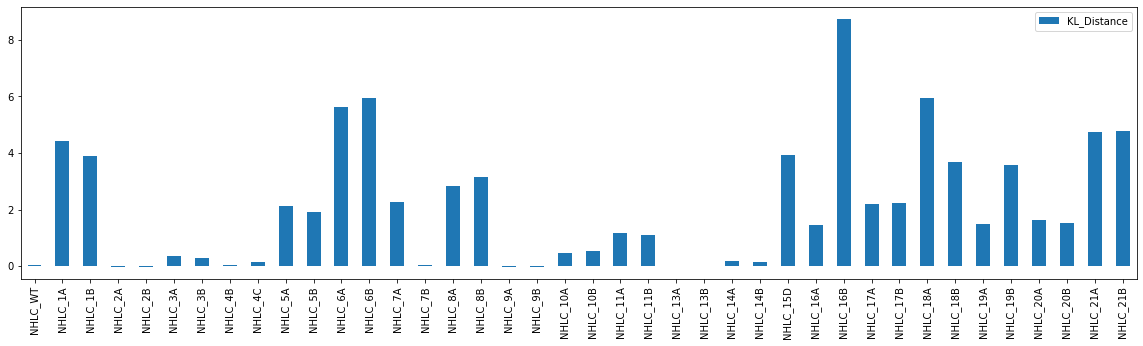

In [50]:
groups = {}
groupcount = {}
finalavg = {}
for key, row in resultframe.iteritems():
    for key2, row2 in row.iteritems():
        group = key2.split("-")[0]
        groups[group] = 0
        groupcount[group] = 0
    for key2, row2 in row.iteritems():
        group = key2.split("-")[0]
        groups[group] += row2
        groupcount[group] += 1

for key,value in groups.items():
    finalavg[key] = value/groupcount[key]

avgresults = pd.DataFrame.from_dict(finalavg, orient = 'index', columns = ["KL_Distance"])
display(avgresults)
ax = avgresults.plot.bar(y="KL_Distance", figsize = (20,5), rot=90)

In [131]:
skbio.diversity.get_alpha_diversity_metrics()

['ace',
 'berger_parker_d',
 'brillouin_d',
 'chao1',
 'chao1_ci',
 'dominance',
 'doubles',
 'enspie',
 'esty_ci',
 'faith_pd',
 'fisher_alpha',
 'gini_index',
 'goods_coverage',
 'heip_e',
 'kempton_taylor_q',
 'lladser_ci',
 'lladser_pe',
 'margalef',
 'mcintosh_d',
 'mcintosh_e',
 'menhinick',
 'michaelis_menten_fit',
 'observed_otus',
 'osd',
 'pielou_e',
 'robbins',
 'shannon',
 'simpson',
 'simpson_e',
 'singles',
 'strong']

In [134]:
div = div.drop("type", axis=1)
div = div.transpose()

In [139]:
diversity_results={}
diversity_results["Simpsons_Index"]=skbio.diversity.alpha_diversity("simpson",div, ids=div.index)
diversity_results["Simspons_Evenness_Measure_E"]=skbio.diversity.alpha_diversity("simpson_e",div, ids=div.index)
display(diversity_results)

{'Simpsons_Index': NHLC_WT     0.042261
 NHLC_1A     0.565481
 NHLC_1B     0.548110
 NHLC_2A     0.000847
 NHLC_2B     0.001544
 NHLC_3A     0.197286
 NHLC_3B     0.177560
 NHLC_4B     0.053872
 NHLC_4C     0.119184
 NHLC_5A     0.417986
 NHLC_5B     0.416278
 NHLC_6A     0.555605
 NHLC_6B     0.534097
 NHLC_7A     0.486946
 NHLC_7B     0.061018
 NHLC_8A     0.539754
 NHLC_8B     0.566954
 NHLC_9A     0.002397
 NHLC_9B     0.002632
 NHLC_10A    0.204710
 NHLC_10B    0.234560
 NHLC_11A    0.335387
 NHLC_11B    0.310176
 NHLC_13A    0.040598
 NHLC_13B    0.004072
 NHLC_14A    0.140532
 NHLC_14B    0.113695
 NHLC_15D    0.498166
 NHLC_16A    0.310729
 NHLC_16B    0.663565
 NHLC_17A    0.533310
 NHLC_17B    0.543642
 NHLC_18A    0.655802
 NHLC_18B    0.536233
 NHLC_19A    0.395795
 NHLC_19B    0.516677
 NHLC_20A    0.344205
 NHLC_20B    0.335404
 NHLC_21A    0.690413
 NHLC_21B    0.691259
 dtype: float64,
 'Simspons_Evenness_Measure_E': NHLC_WT     0.116014
 NHLC_1A     0.460279
 NHLC_1B  